# GENDER INCOME GAP


You may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? 

Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?

In [280]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy import stats

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [281]:
url = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/'

allmales = {'all': pd.read_excel(url + 'pinc08_2_1_1.xls',header = 9),
            'white':pd.read_excel(url + 'pinc08_2_1_4.xls',header = 9),
            'black':pd.read_excel(url + 'pinc08_2_1_6.xls',header = 9),
            'asian': pd.read_excel(url + 'pinc08_2_1_8.xls',header = 9),
            'hispanic':pd.read_excel(url + 'pinc08_2_1_9.xls',header = 9)}

allfemales = {'all': pd.read_excel(url + 'pinc08_3_1_1.xls',header = 9),
            'white':pd.read_excel(url + 'pinc08_3_1_4.xls',header = 9),
            'black':pd.read_excel(url + 'pinc08_3_1_6.xls',header = 9),
            'asian': pd.read_excel(url + 'pinc08_3_1_8.xls',header = 9),
            'hispanic':pd.read_excel(url + 'pinc08_3_1_9.xls',header = 9)}

In [282]:
 for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# AllMales

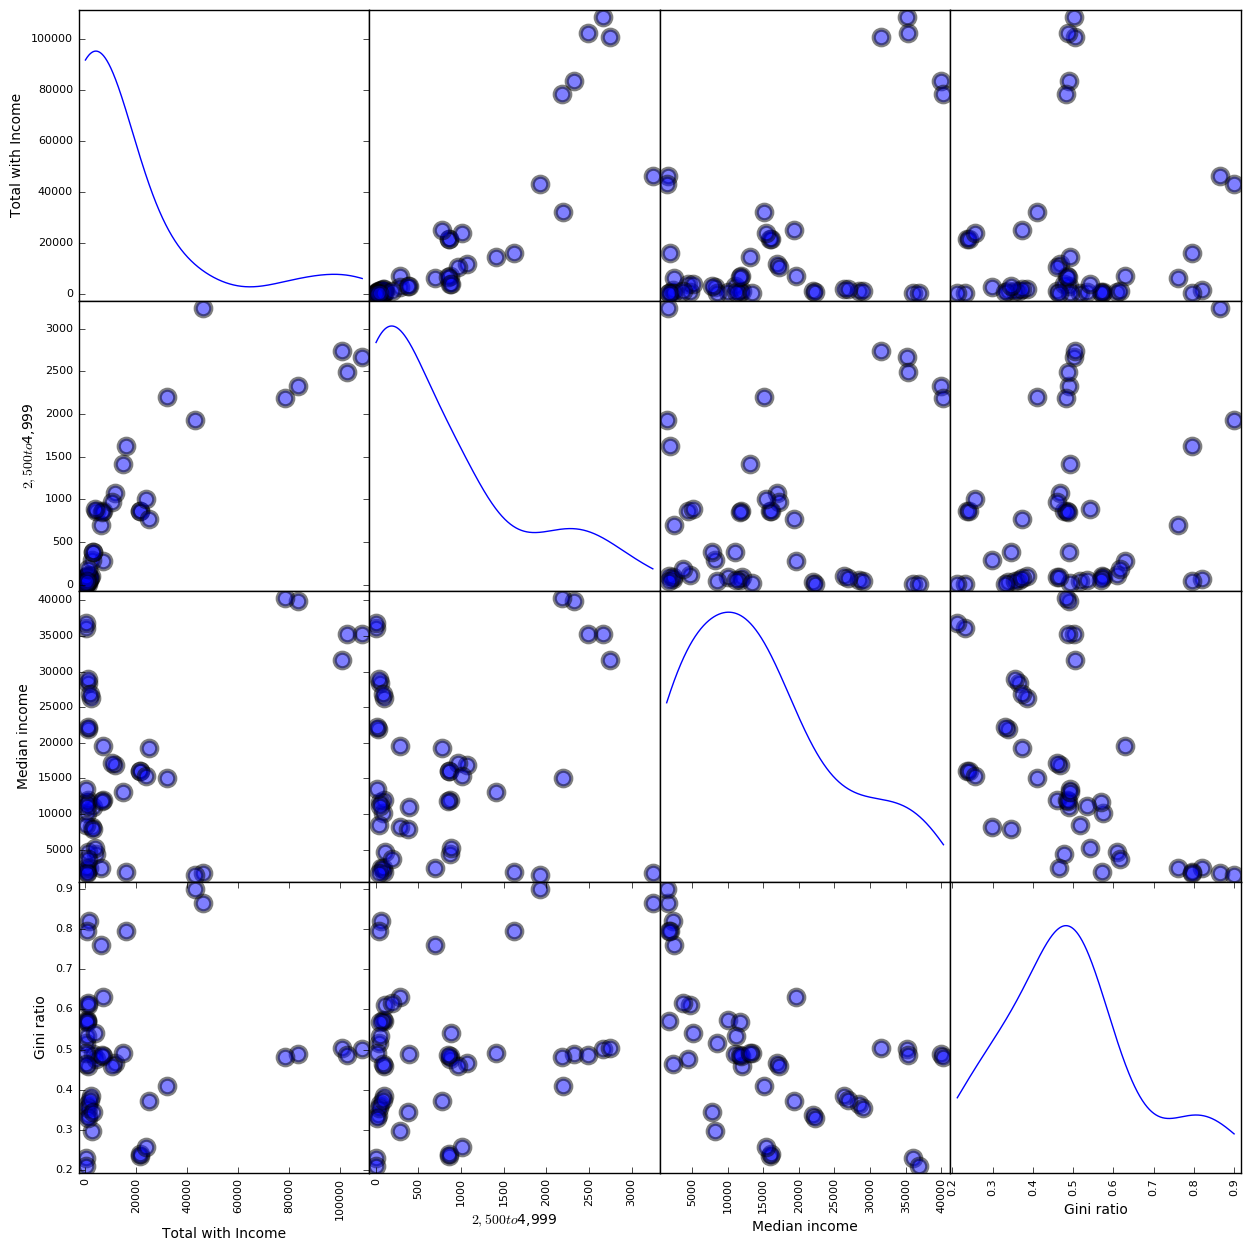

In [283]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')    

# AllFemale

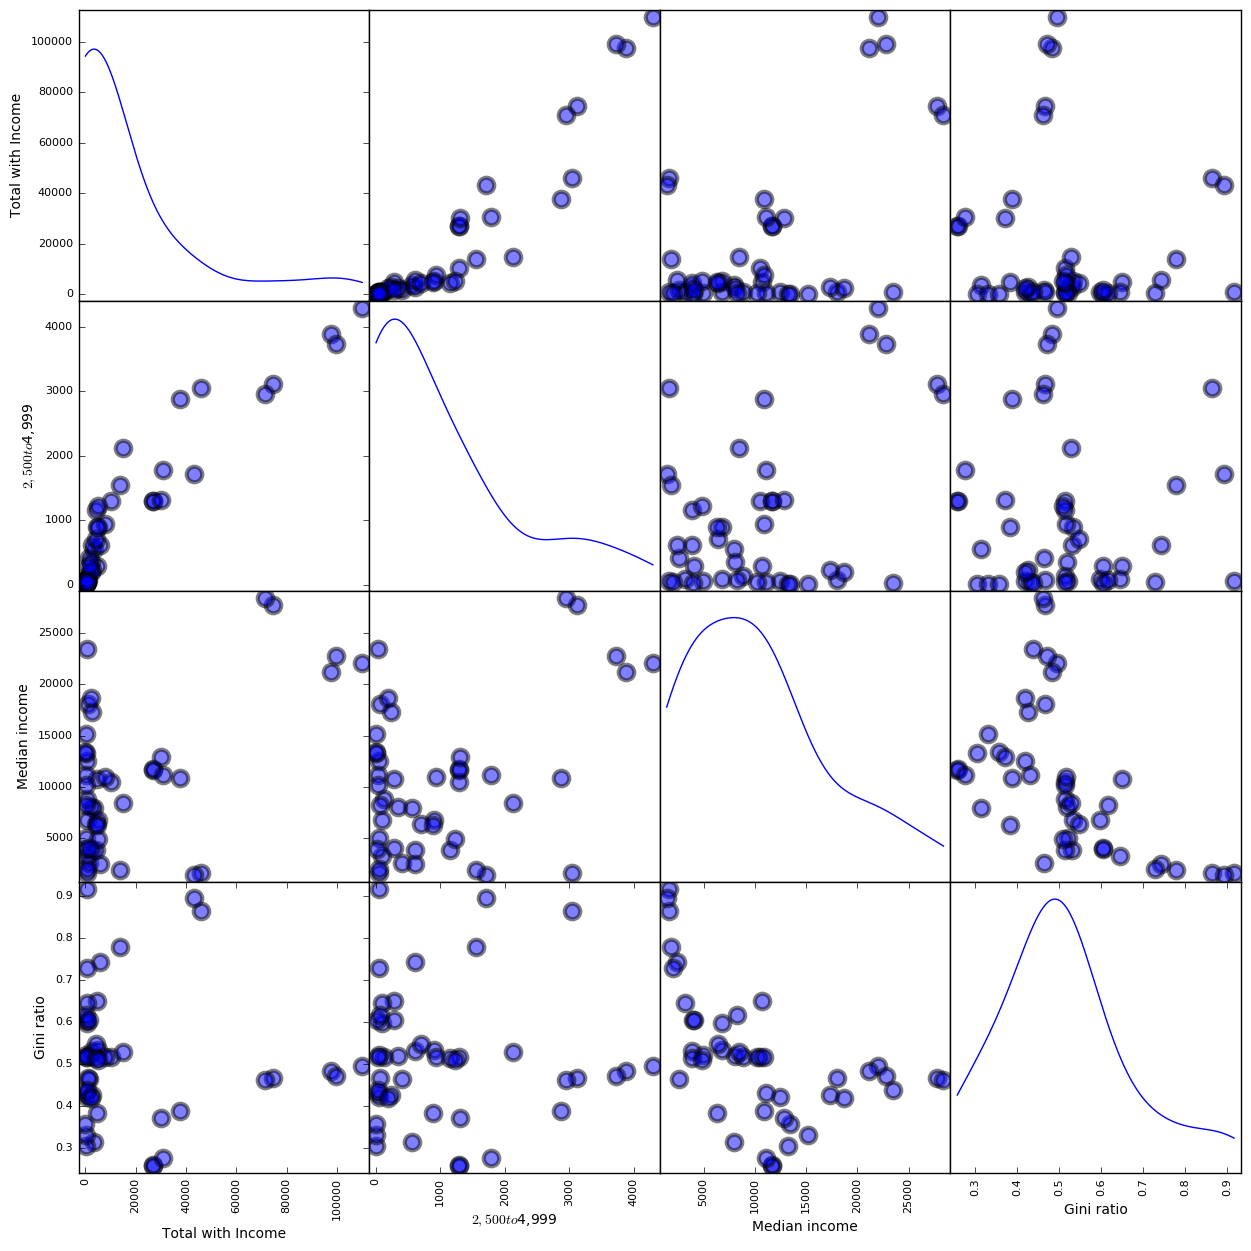

In [284]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')    

# Total Median Income of females vs the Total Median Income of males + Part 4 with beta_line


In [285]:
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])

cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()


LinregressResult(slope=0.59384350434286659, intercept=1674.6926880978899, rvalue=0.97554013004105611, pvalue=0.00089011086804775558, stderr=0.066906278709485956)

## All

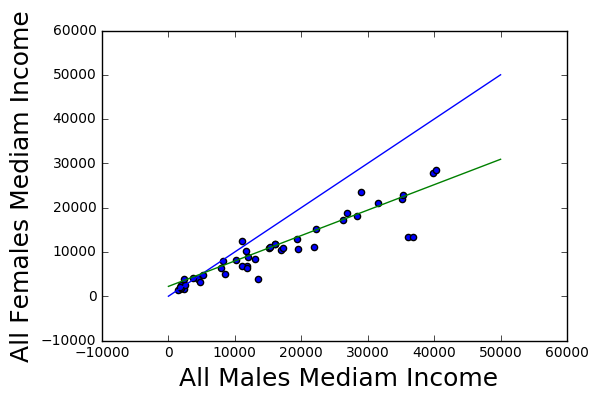

In [315]:


pl.scatter (allmales['all'][u'Median income'], allfemales['all']
            [u'Median income'])
pl.xlabel(' All Males Mediam Income', fontsize=18)
pl.ylabel('All Females Mediam Income', fontsize=18) 
pl.plot([0,50000],[0,50000])
pl.plot([0,50000],[beta0,50000*beta1+beta0])


## White

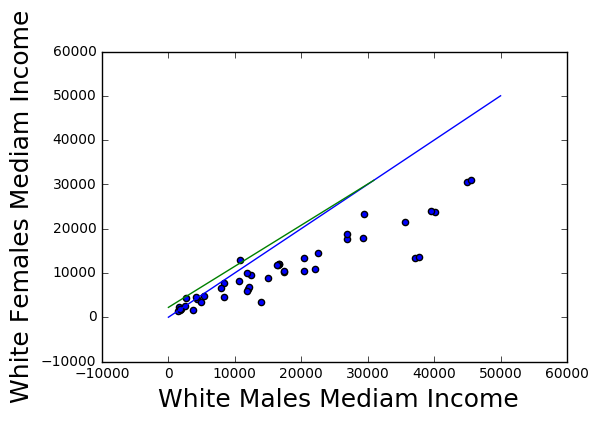

In [316]:
pl.scatter (allmales['white'][u'Median income'], allfemales['white']
            [u'Median income'])
pl.xlabel(' White Males Mediam Income', fontsize=18)
pl.ylabel('White Females Mediam Income', fontsize=18) 
pl.plot([0,50000],[0,50000])
pl.plot([0,50000*beta1+beta0],[beta0,50000*beta1+beta0])

regr = stats.linregress(all_males,all_females)
slope_all = regr[0]
intecept_all = regr[1]



## Black 

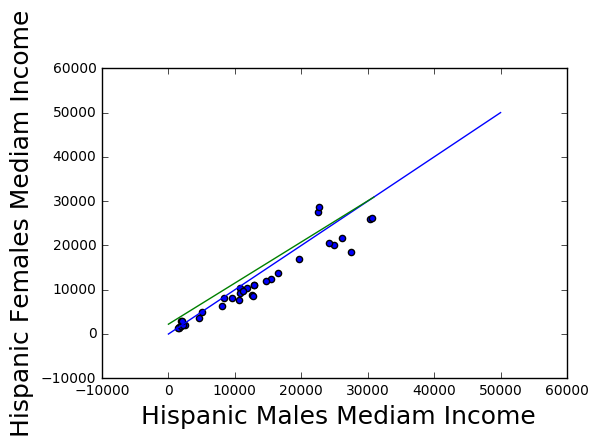

In [317]:
pl.scatter (allmales['black'][u'Median income'], allfemales['black']
            [u'Median income'])
pl.xlabel(' Hispanic Males Mediam Income', fontsize=18)
pl.ylabel('Hispanic Females Mediam Income', fontsize=18) 
pl.plot([0,50000],[0,50000])
pl.plot([0,50000*beta1+beta0],[beta0,50000*beta1+beta0])



# Hispanic

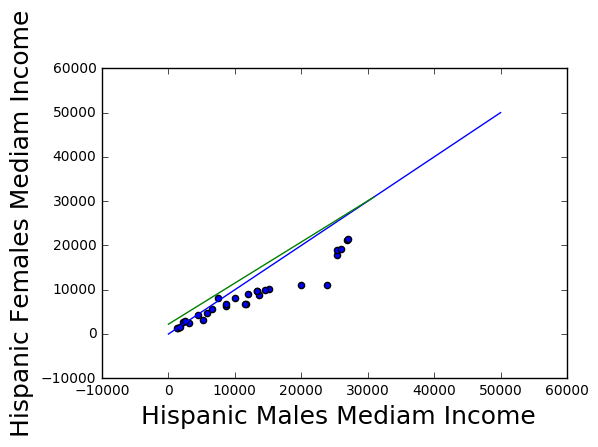

In [318]:
pl.scatter (allmales['hispanic'][u'Median income'], allfemales['hispanic']
            [u'Median income'])
pl.xlabel(' Hispanic Males Mediam Income', fontsize=18)
pl.ylabel('Hispanic Females Mediam Income', fontsize=18) 
pl.plot([0,50000],[0,50000])
pl.plot([0,50000*beta1+beta0],[beta0,50000*beta1+beta0])



# Asian

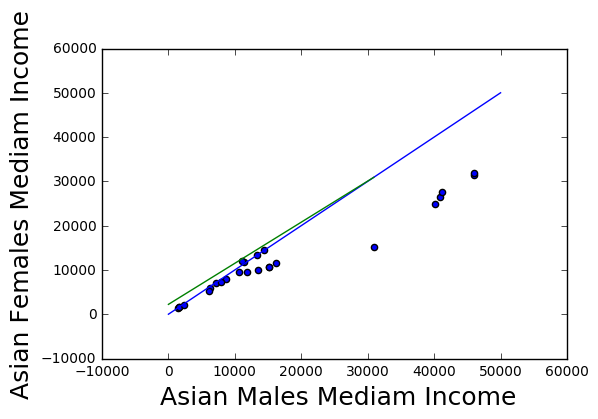

In [319]:
pl.scatter (allmales['asian'][u'Median income'], allfemales['asian']
            [u'Median income'])
pl.xlabel(' Asian Males Mediam Income', fontsize=18)
pl.ylabel('Asian Females Mediam Income', fontsize=18) 
pl.plot([0,50000],[0,50000])
pl.plot([0,50000*beta1+beta0],[beta0,50000*beta1+beta0])



# Part 5

In [320]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())

In [321]:
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())


In [328]:
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))


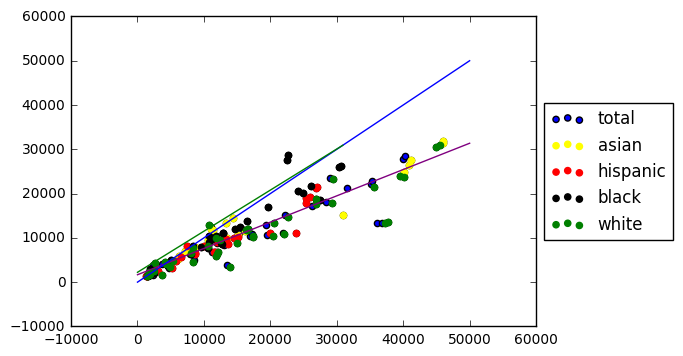

In [326]:
pl.scatter (all_males_allincomes, all_females_allincomes)

pl.scatter (allmales['asian'][u'Median income'], allfemales['asian']
            [u'Median income'], color='yellow')
pl.scatter (allmales['hispanic'][u'Median income'], allfemales['hispanic']
            [u'Median income'], color='red')
pl.scatter (allmales['black'][u'Median income'], allfemales['black']
            [u'Median income'], color='black')
pl.scatter (allmales['white'][u'Median income'], allfemales['white']
            [u'Median income'], color='green')

pl.legend(['total','asian', 'hispanic','black','white'], loc='center left', bbox_to_anchor=(1, 0.5) )

regr = stats.linregress(all_males,all_females)
slope_all = regr[0]
intecept_all = regr[1]
pl.plot([0,50000],[intecept_all,slope_all*50000+intecept_all ], color='purple')

pl.plot([0,50000],[0,50000])
pl.plot([0,50000*beta1+beta0],[beta0,50000*beta1+beta0])



# Part 6 and Part 7
## Pick a salary for a man = 50000
## Predict the equivalent salary for a woman

In [ ]:
mysalary = 80000


In [ ]:
woman_equivalent_salary = mysalary*beta1+beta0
woman_equivalent_salary